# Credit Score Classification

We use customer information to classify customer credit core as good, standard or poor. 

Dataset source: https://statso.io/credit-score-classification-case-study/

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# load the csv file
inpath = r'/Users/akhilmathur/Desktop/python_files/datasets/train.csv'
df = pd.read_csv(inpath)

##  Exploratory Data Analysis

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
print("Total Rows & Columns in df: {}\n\n\n".format(df.shape))
df.info()

Total Rows & Columns in df: (100000, 28)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  T

In [5]:
# No missing values as seen from above table. Check for duplicate columns 
print("Total duplicated rows :{}".format(df['ID'].duplicated().sum()))

Total duplicated rows :0


In [6]:
# # we remove columns that from the outset don't help 
# rmv_cols = ['ID', 'Customer_ID', 'Name', 'Month', 'SSN']
# df.drop(rmv_cols, axis = 'columns',inplace=True)
# df_num = df.select_dtypes(exclude = ['object'])
# df_num['Credit_Score'] = df['Credit_Score']

# sns.pairplot(df_num, hue = 'Credit_Score')

/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


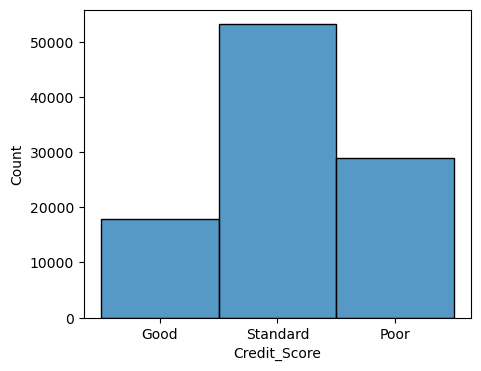

In [7]:
plt.figure(figsize=(5,4))
sns.histplot(df, x = 'Credit_Score');

In [8]:
# check if target class balanced 
df.Credit_Score.value_counts(normalize = True).round(2)

Credit_Score
Standard    0.53
Poor        0.29
Good        0.18
Name: proportion, dtype: float64

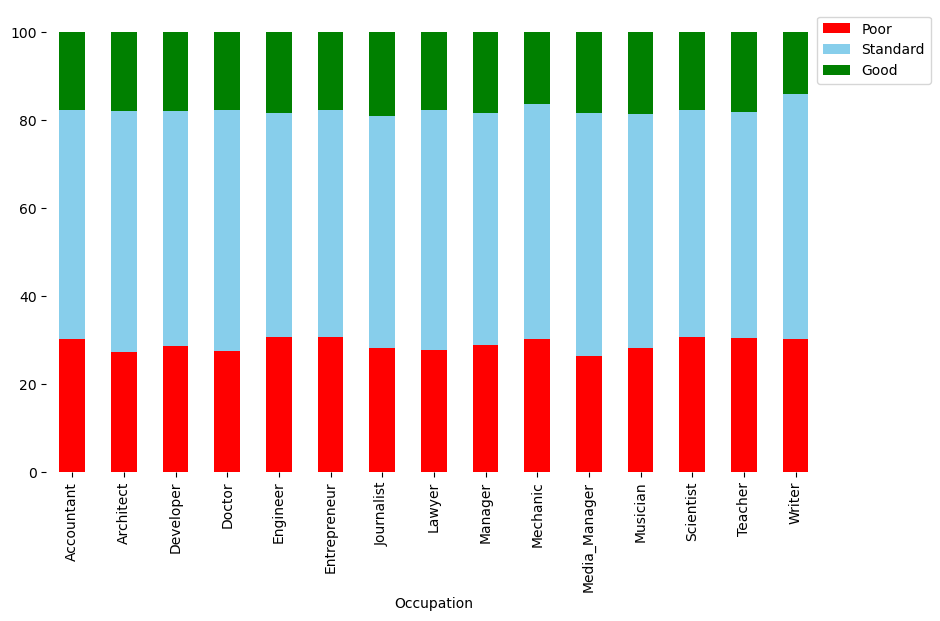

In [9]:
df_occ = (df
      .groupby("Occupation")["Credit_Score"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())[['Poor','Standard', 'Good']]
df_occ.plot(kind = 'bar', stacked = True, color=['red', 'skyblue', 'green'], figsize = (10,6));
plt.legend(fontsize = 10, loc="upper right", bbox_to_anchor=(1.15, 1.0))

for spine in plt.gca().spines.values():
    spine.set_visible(False)

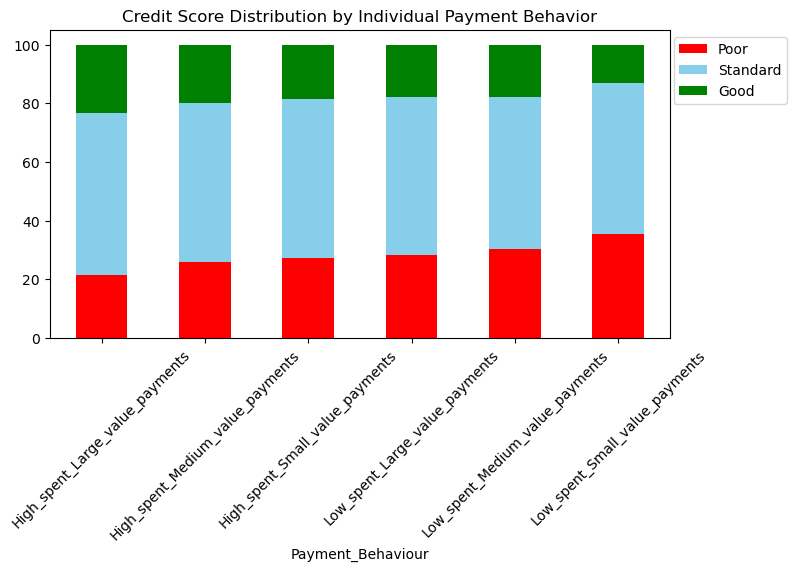

In [10]:
df_occ = (df
      .groupby("Payment_Behaviour")["Credit_Score"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())[['Poor','Standard', 'Good']]
df_occ.plot(kind = 'bar', stacked = True, color=['red', 'skyblue', 'green'], figsize = (8,4));
plt.title('Credit Score Distribution by Individual Payment Behavior')
plt.xticks(rotation=45, horizontalalignment='center',verticalalignment='top',multialignment='center')
plt.legend(fontsize = 10, loc="upper right", bbox_to_anchor=(1.2, 1.0))

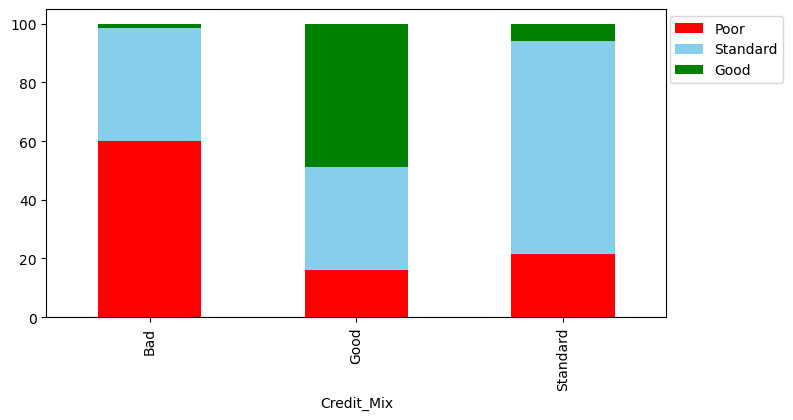

In [11]:
df_occ = (df
      .groupby("Credit_Mix")["Credit_Score"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())[['Poor','Standard', 'Good']]
df_occ.plot(kind = 'bar', stacked = True, color=['red', 'skyblue', 'green'], figsize = (8,4));
plt.legend(fontsize = 10, loc="upper right", bbox_to_anchor=(1.2, 1.0))

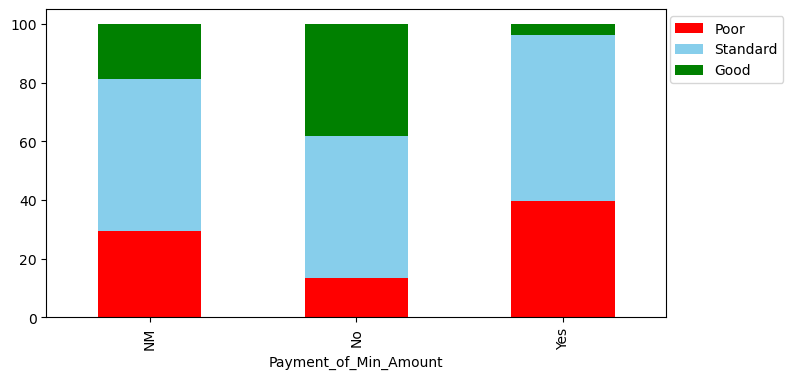

In [12]:
df_occ = (df
      .groupby("Payment_of_Min_Amount")["Credit_Score"]
      .value_counts(normalize=True)
      .mul(100)
      .round(2)
      .unstack())[['Poor','Standard', 'Good']]
df_occ.plot(kind = 'bar', stacked = True, color=['red', 'skyblue', 'green'], figsize = (8,4));
plt.legend(fontsize = 10, loc="upper right", bbox_to_anchor=(1.2, 1.0))

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

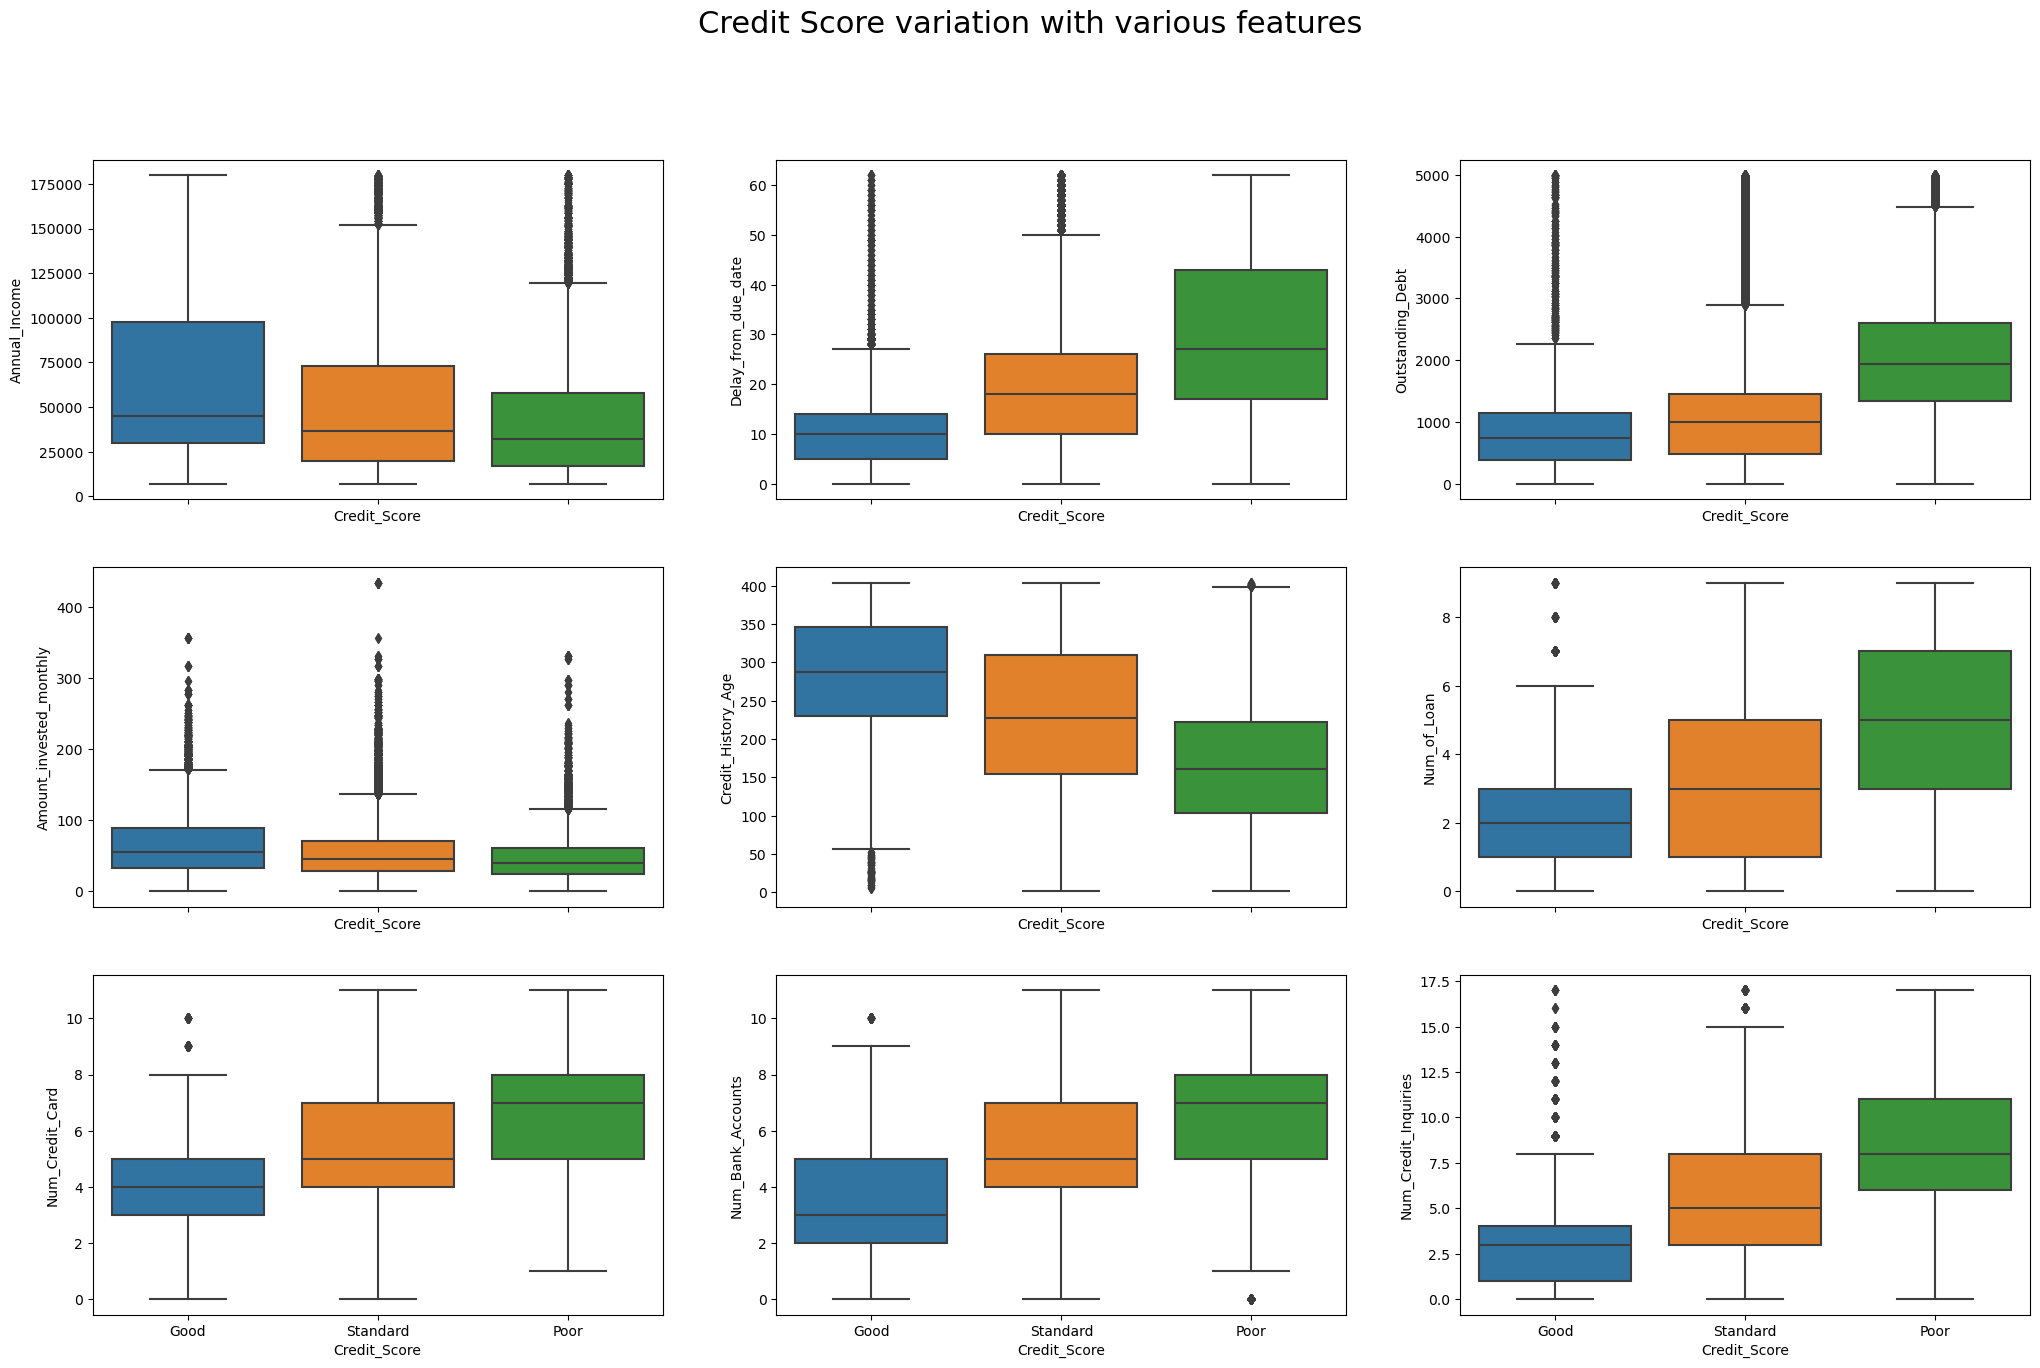

In [14]:
fig, ax = plt.subplots(3,3, sharex = True, figsize=(25,15))
fig.suptitle('Credit Score variation with various features', fontsize = 22)

sns.boxplot(ax=ax[0,0], data=df, x= "Credit_Score", y= "Annual_Income");
sns.boxplot(ax=ax[0,1], data=df, x= "Credit_Score", y= "Delay_from_due_date");
sns.boxplot(ax=ax[0,2], data=df, x= "Credit_Score", y= "Outstanding_Debt");
sns.boxplot(ax=ax[1,0], data=df, x= "Credit_Score", y= "Amount_invested_monthly");
sns.boxplot(ax=ax[1,1], data=df, x= "Credit_Score", y= "Credit_History_Age");
sns.boxplot(ax=ax[1,2], data=df, x= "Credit_Score", y= "Num_of_Loan");
sns.boxplot(ax=ax[2,0], data=df, x= "Credit_Score", y= "Num_Credit_Card");
sns.boxplot(ax=ax[2,1], data=df, x= "Credit_Score", y= "Num_Bank_Accounts");
sns.boxplot(ax=ax[2,2], data=df, x= "Credit_Score", y= "Num_Credit_Inquiries");

# Feature Engineering - Encoding and Scaling 

In [15]:
# count of unique values for object type columns (string)
str_cols = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour', 'Type_of_Loan']

for c_ in str_cols:
        unq_vls = set(df[c_])
        print("{} Unique values of {}:{}".format(len(unq_vls),c_,unq_vls))
        print ('\n')

15 Unique values of Occupation:{'Mechanic', 'Lawyer', 'Musician', 'Teacher', 'Entrepreneur', 'Developer', 'Writer', 'Manager', 'Journalist', 'Engineer', 'Doctor', 'Media_Manager', 'Architect', 'Accountant', 'Scientist'}


3 Unique values of Credit_Mix:{'Bad', 'Standard', 'Good'}


3 Unique values of Payment_of_Min_Amount:{'NM', 'Yes', 'No'}


6 Unique values of Payment_Behaviour:{'Low_spent_Large_value_payments', 'High_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments'}


6261 Unique values of Type_of_Loan:{'Not Specified, Student Loan, Debt Consolidation Loan, Home Equity Loan, and Mortgage Loan', 'Credit-Builder Loan, Not Specified, Student Loan, Student Loan, Mortgage Loan, and Student Loan', 'Payday Loan, Home Equity Loan, Student Loan, Student Loan, Home Equity Loan, Credit-Builder Loan, Debt Consolidation Loan, and Debt Consolidation Loan', 'Mortgage Loan, Auto Loa

In [16]:
"""
Remove columns not needed for training model:
1. ID, Customer_ID, Name, SSN : not useful to predict fresh individual's score 
2. Monthly_Inhand_Salary : correlated with annual income (seen in scatter plot) so redundant 
3. Type_of_Loan : unclear string labels with lot of 'unspecified' rows - encoding would be costly too

"""


rmv_cols = ['ID', 'Customer_ID', 'Name', 'Month', 'SSN', 'Monthly_Inhand_Salary', 'Type_of_Loan']
df_cln = df.drop(rmv_cols, axis = 'columns')

# remove the 'NM' category from Payment_of_Min_Amount column 
df_cln = df_cln[(df_cln.Payment_of_Min_Amount != 'NM')]
print ("{} rows removed after cleaning.".format(len(df) - len(df_cln)))

12007 rows removed after cleaning.


In [17]:
print(df_cln.info())

<class 'pandas.core.frame.DataFrame'>
Index: 87993 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       87993 non-null  float64
 1   Occupation                87993 non-null  object 
 2   Annual_Income             87993 non-null  float64
 3   Num_Bank_Accounts         87993 non-null  float64
 4   Num_Credit_Card           87993 non-null  float64
 5   Interest_Rate             87993 non-null  float64
 6   Num_of_Loan               87993 non-null  float64
 7   Delay_from_due_date       87993 non-null  float64
 8   Num_of_Delayed_Payment    87993 non-null  float64
 9   Changed_Credit_Limit      87993 non-null  float64
 10  Num_Credit_Inquiries      87993 non-null  float64
 11  Credit_Mix                87993 non-null  object 
 12  Outstanding_Debt          87993 non-null  float64
 13  Credit_Utilization_Ratio  87993 non-null  float64
 14  Credit_Hist

In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn import preprocessing

# pre-processing : change the categorical labels to numerical for training ML model 
str_cols = ['Occupation','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour']

transformer = make_column_transformer(
    (OneHotEncoder(), str_cols),
    remainder='passthrough')

transformed = transformer.fit_transform(df_cln)
df_pp = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
df_pp.rename(columns = lambda x: x.removeprefix('remainder__'), inplace = True)

# label encoding for target variable
cs_map  = {"Poor":0, "Standard":1, "Good":2}
df_pp['Credit_Score'] = df_pp['Credit_Score'].replace(cs_map)

# covert to numeric dtypes for all columns 
df_pp = df_pp.apply(pd.to_numeric)

X  = df_pp.drop('Credit_Score', axis = 'columns')
scaler = preprocessing.MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)

In [33]:
# compare the df changes before and after feature encoding 
print("df shape before encoding and removing rows: {}.".format(df_cln.shape))
print("df shape after encoding and removing rows: {}.".format(df_pp.shape))
print("\n")

print("New list of columns:\n{}".format(df_pp.columns.tolist()))

df shape before encoding and removing rows: (87993, 21).
df shape after encoding and removing rows: (87993, 43).


New list of columns:
['onehotencoder__Occupation_Accountant', 'onehotencoder__Occupation_Architect', 'onehotencoder__Occupation_Developer', 'onehotencoder__Occupation_Doctor', 'onehotencoder__Occupation_Engineer', 'onehotencoder__Occupation_Entrepreneur', 'onehotencoder__Occupation_Journalist', 'onehotencoder__Occupation_Lawyer', 'onehotencoder__Occupation_Manager', 'onehotencoder__Occupation_Mechanic', 'onehotencoder__Occupation_Media_Manager', 'onehotencoder__Occupation_Musician', 'onehotencoder__Occupation_Scientist', 'onehotencoder__Occupation_Teacher', 'onehotencoder__Occupation_Writer', 'onehotencoder__Credit_Mix_Bad', 'onehotencoder__Credit_Mix_Good', 'onehotencoder__Credit_Mix_Standard', 'onehotencoder__Payment_of_Min_Amount_No', 'onehotencoder__Payment_of_Min_Amount_Yes', 'onehotencoder__Payment_Behaviour_High_spent_Large_value_payments', 'onehotencoder__Payment_B

# Training Data with Classifier Model

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 4)

In [35]:
print(X_train.shape)
print(X_test.shape)


print(y_train.shape)
print(y_test.shape)

(61595, 42)
(26398, 42)
(61595,)
(26398,)


### Logistic Regression (Linear Model)

In [36]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

lr = LogisticRegression(solver = 'lbfgs', penalty = 'l2', C = 1, max_iter = 1000).fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [37]:
# check results of model 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
print("F1-Score : {}".format(f1_score(y_test,y_pred, average = 'weighted').round(2)))
print("Accuracy Score : {}".format(accuracy_score(y_test,y_pred).round(2)))
print("\n")
print("classification report : \n{}".format(classification_report(y_test, y_pred)))

F1-Score : 0.66
Accuracy Score : 0.66


classification report : 
              precision    recall  f1-score   support

           0       0.66      0.54      0.59      7598
           1       0.71      0.72      0.71     14110
           2       0.56      0.68      0.61      4690

    accuracy                           0.66     26398
   macro avg       0.64      0.65      0.64     26398
weighted avg       0.67      0.66      0.66     26398



In [38]:
# trying to optimize the hyperparameters using logisticregressionCV 
lr_cv = LogisticRegressionCV(Cs=10 , cv=5, penalty='l2', solver='liblinear').fit(X_train, y_train)
y_pred_cv = lr_cv.predict(X_test)
# check results of model 
print("F1-Score : {}".format(f1_score(y_test,y_pred_cv, average = 'weighted').round(2)))
print("Accuracy Score : {}".format(accuracy_score(y_test,y_pred_cv).round(2)))
print("\n")
print("classification report : \n{}".format(classification_report(y_test, y_pred_cv)))

F1-Score : 0.66
Accuracy Score : 0.66


classification report : 
              precision    recall  f1-score   support

           0       0.65      0.54      0.59      7598
           1       0.72      0.70      0.71     14110
           2       0.54      0.72      0.62      4690

    accuracy                           0.66     26398
   macro avg       0.64      0.66      0.64     26398
weighted avg       0.67      0.66      0.66     26398



### Support Vector Machine (SVM)

In [39]:
from sklearn.svm import LinearSVC

# create the linear support vector classification model 
lsvc = LinearSVC(penalty = 'l2', C=1)
lsvc.fit(X_train,y_train)
y_svm_pred = lsvc.predict(X_test)

/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [40]:
# check results of model 
print("F1-Score : {}".format(f1_score(y_test,y_svm_pred, average = 'weighted').round(2)))
print("Accuracy Score : {}".format(accuracy_score(y_test,y_svm_pred).round(2)))
print("\n")
print("classification report : \n{}".format(classification_report(y_test, y_svm_pred)))

F1-Score : 0.66
Accuracy Score : 0.66


classification report : 
              precision    recall  f1-score   support

           0       0.65      0.55      0.59      7598
           1       0.73      0.68      0.71     14110
           2       0.52      0.76      0.61      4690

    accuracy                           0.66     26398
   macro avg       0.63      0.66      0.64     26398
weighted avg       0.67      0.66      0.66     26398



###  K-Nearest Neighbors (Non-linear model)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test.values)

# check results of model 
print("F1-Score : {}".format(f1_score(y_test,y_pred_knn, average = 'weighted').round(2)))
print("Accuracy Score : {}".format(accuracy_score(y_test,y_pred_knn).round(2)))
print("\n")
print("classification report : \n{}".format(classification_report(y_test, y_pred_knn)))

/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


F1-Score : 0.69
Accuracy Score : 0.69


classification report : 
              precision    recall  f1-score   support

           0       0.63      0.68      0.66      7598
           1       0.74      0.73      0.74     14110
           2       0.61      0.56      0.58      4690

    accuracy                           0.69     26398
   macro avg       0.66      0.66      0.66     26398
weighted avg       0.69      0.69      0.69     26398



In [28]:
knn_df = pd.DataFrame()

for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test.values)

    # check results of model     
    f1 = f1_score(y_test,y_pred_knn, average = 'weighted').round(2)
    acc_ = accuracy_score(y_test,y_pred_knn).round(2) 
    knn_df = knn_df._append({'k-value': k, 'f1_score':f1, 'accuracy_score':acc_}, ignore_index = True)
knn_df

/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/akhilmathur/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.w

,k-value,f1_score,accuracy_score
0,1.0,0.70,0.70
1,3.0,0.69,0.69
2,5.0,0.68,0.68
3,7.0,0.68,0.68
4,9.0,0.68,0.68
5,11.0,0.68,0.68
6,13.0,0.68,0.68
7,15.0,0.68,0.68
8,17.0,0.68,0.68
9,19.0,0.68,0.68


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


# check results of model 
print("F1-Score : {}".format(f1_score(y_test,y_pred_dt, average = 'weighted').round(2)))
print("Accuracy Score : {}".format(accuracy_score(y_test,y_pred_dt).round(2)))
print("\n")
print("classification report : \n{}".format(classification_report(y_test, y_pred_dt)))

F1-Score : 0.73
Accuracy Score : 0.73


classification report : 
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      7598
           1       0.76      0.75      0.76     14110
           2       0.67      0.69      0.68      4690

    accuracy                           0.73     26398
   macro avg       0.72      0.72      0.72     26398
weighted avg       0.73      0.73      0.73     26398



In [30]:
# look at the node count and max depth - should we try to prune?
print(dt.tree_.node_count)
print(dt.tree_.max_depth)

22301
41


In [31]:
# lets fine-tune the tree hyperparameters to try and improve model 
dt2 = DecisionTreeClassifier(max_depth = 20 , min_samples_leaf = 3)

dt2.fit(X_train, y_train)
y_pred_dt2 = dt2.predict(X_test)

# check results of model 
print("F1-Score : {}".format(f1_score(y_test,y_pred_dt2, average = 'weighted').round(2)))
print("Accuracy Score : {}".format(accuracy_score(y_test,y_pred_dt2).round(2)))
print("\n")
print("classification report : \n{}".format(classification_report(y_test, y_pred_dt2)))

F1-Score : 0.73
Accuracy Score : 0.73


classification report : 
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      7598
           1       0.78      0.75      0.76     14110
           2       0.63      0.69      0.66      4690

    accuracy                           0.73     26398
   macro avg       0.71      0.73      0.72     26398
weighted avg       0.74      0.73      0.73     26398



### Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_depth = 100, bootstrap = True)   
clf.fit(X_train, y_train) 

# predict class using testing data 
y_pred_rf = clf.predict(X_test)

# check results of model 
print("F1-Score : {}".format(f1_score(y_test,y_pred_rf, average = 'weighted').round(2)))
print("Accuracy Score : {}".format(accuracy_score(y_test,y_pred_rf).round(2)))
print("\n")
print("classification report : \n{}".format(classification_report(y_test, y_pred_rf)))

F1-Score : 0.81
Accuracy Score : 0.81


classification report : 
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      7598
           1       0.83      0.81      0.82     14110
           2       0.77      0.77      0.77      4690

    accuracy                           0.81     26398
   macro avg       0.80      0.80      0.80     26398
weighted avg       0.81      0.81      0.81     26398



In [1]:
# can fine tune the hyperparameters to find the optimium forest model 

# from sklearn.model_selection import GridSearchCV


# param_grid = {'n_estimators': [2*n for n in range(25)],
#              'max_depth' : [2*n for n in range(15) ],
#              'max_features':["auto", "sqrt", "log2"]}

# model = RandomForestClassifier()
# search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
# search.fit(X_train, y_train)